## MNIST Image Data Recognition and Analysis

**Dataset required in this project:** 
* MNIST dataset


** NOTE **
* You can directly load the dataset from keras using: `from keras.datasets import mnist`
* You may need install tensorflow and keras first: https://keras.io/ 


*The Problem: Identifying the Handwritten Digits*

The task of automatically recognizing and categorizing handwritten digits from photographs is known as handwritten digit recognition. There are various reasons why this problem is intriguing and significant:

1) Numerous real-world uses for digital recognition exist, such as automated form filling, postal mail sorting, and bank check processing.

2) The accuracy and effectiveness of optical character recognition (OCR) systems, which are extensively employed in document digitization and archive operations, can be improved by developing algorithms for handwritten digit recognition.

3) A typical problem in computer vision and machine learning is handwritten digit recognition, which is used as a standard to compare different methods and algorithms.

4) Overcoming the difficulties associated with handwritten digit recognition advances deep learning, pattern recognition, and image processing—all of which have wider ramifications in other fields.

We can expedite several business procedures, enhance the accessibility of digital information, and expand the capacity of machine learning systems to recognize and comprehend handwritten material by creating precise and effective models for handwritten digit recognition.




# Data Collection/Processing: 

In [1]:
# Importing necessary libraries
from keras.datasets import mnist  # Importing MNIST dataset
from tensorflow.keras.utils import to_categorical  # Importing utility function for one-hot encoding

# Loading the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Pre-processing the given MNIST dataset:
# Reshaping train and test images to have a single channel and normalizing pixel values to range [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encoding the train and test labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Printing the shape of the training set
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)

# Printing the shape of the test set
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Training images shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test images shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


# Data Exploration: Exploring the your data

**Plotting some properties/statistics/distribution of the obatined MNIST data samples** 

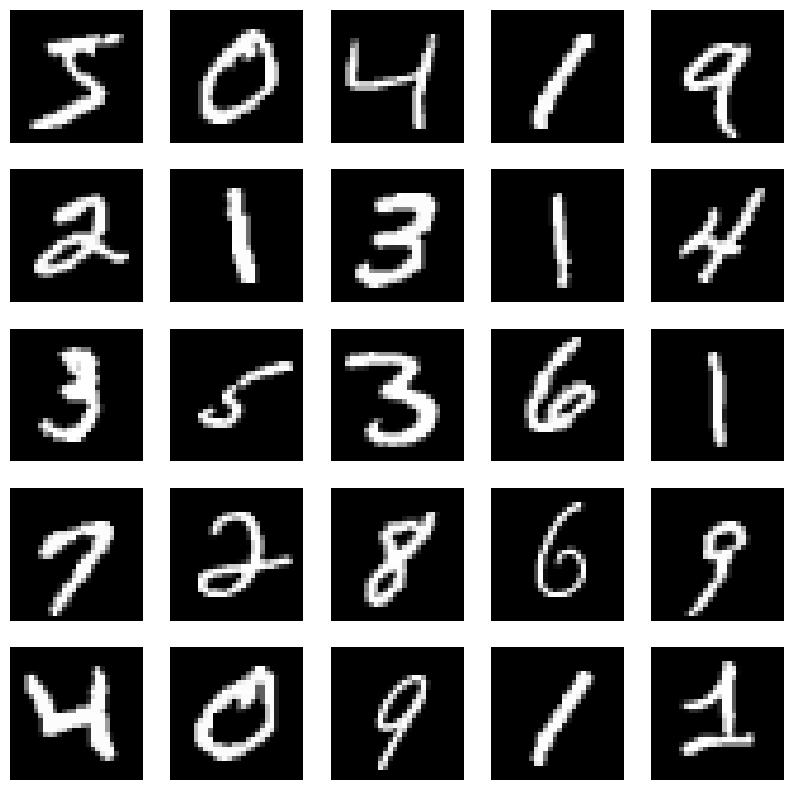

In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Visualize some sample images from the training set
plt.figure(figsize=(10, 10))  # Set the figure size for the plot

# Loop through the first 25 images in the training set
for i in range(25):
    plt.subplot(5, 5, i + 1)  # Create a subplot for each image in a 5x5 grid
    plt.imshow(train_images[i], cmap='gray')  # Display the image using a grayscale colormap
    plt.axis('off')  # Turn off the axes for better visualization
plt.show()  # Show the plot with the sample images



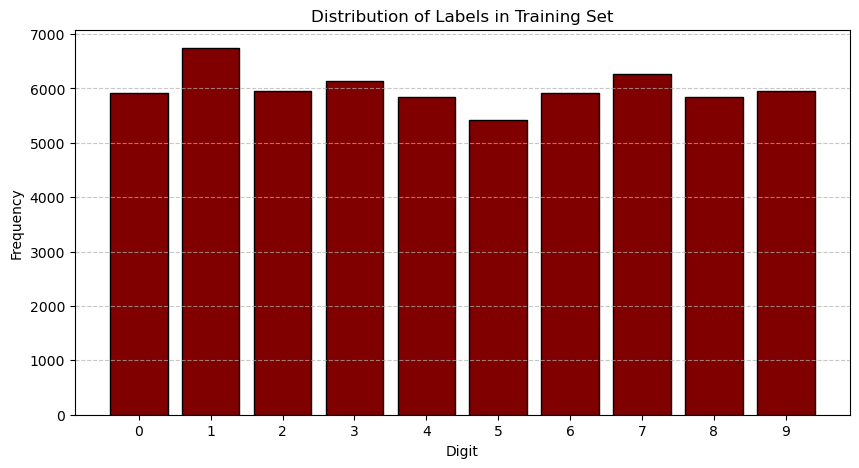

In [5]:
# Assuming train_labels contain the actual digit labels (not one-hot encoded)
# Convert one-hot encoded train_labels back to single digit labels
train_labels_digit = np.argmax(train_labels, axis=1)

# Plotting the distribution of labels
plt.figure(figsize=(10, 5))
plt.hist(train_labels_digit, bins=range(11), align='left', rwidth=0.8, color='maroon', edgecolor='black')
plt.xlabel('Digit')  # Labeling x-axis as 'Digit'
plt.ylabel('Frequency')  # Labeling y-axis as 'Frequency'
plt.title('Distribution of Labels in Training Set')  # Setting the title of the plot
plt.xticks(range(10))  # Setting the ticks on x-axis from 0 to 9
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines to y-axis with dashed lines
plt.show()  # Displaying the plot


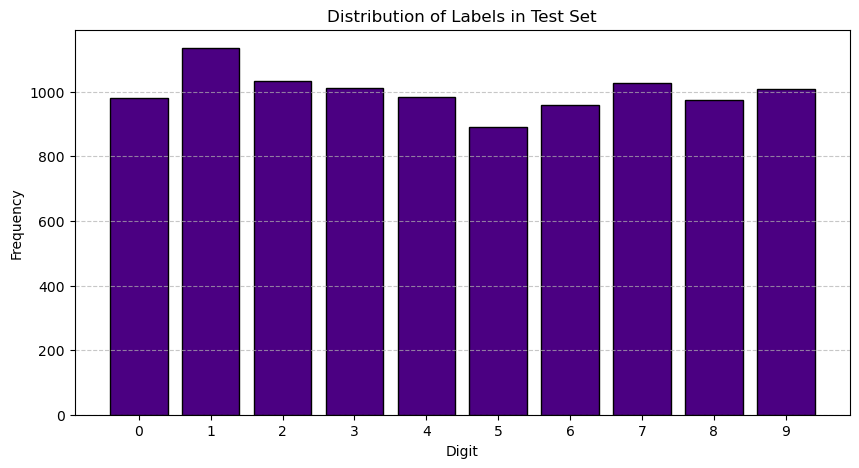

In [4]:
# Assuming test_labels contain the actual digit labels (not one-hot encoded)
# Convert one-hot encoded test_labels back to single digit labels
test_labels_digit = np.argmax(test_labels, axis=1)

# Plotting the distribution of labels in the test set
plt.figure(figsize=(10, 5))  # Setting the size of the figure
plt.hist(test_labels_digit, bins=range(11), align='left', rwidth=0.8, color='indigo', edgecolor='black')  # Creating a histogram
plt.xlabel('Digit')  # Labeling x-axis as 'Digit'
plt.ylabel('Frequency')  # Labeling y-axis as 'Frequency'
plt.title('Distribution of Labels in Test Set')  # Setting the title of the plot
plt.xticks(range(10))  # Setting the ticks on x-axis from 0 to 9
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines to y-axis with dashed lines
plt.show()  # Displaying the plot


In [6]:
# Displaying basic statistics about pixel values in the training images
print("Pixel value statistics:")  # Printing a header indicating pixel value statistics
print("Min pixel value:", np.min(train_images))  # Printing the minimum pixel value in the training images
print("Max pixel value:", np.max(train_images))  # Printing the maximum pixel value in the training images
print("Mean pixel value:", np.mean(train_images))  # Printing the mean pixel value in the training images
print("Standard deviation of pixel values:", np.std(train_images))  # Printing the standard deviation of pixel values in the training images


Pixel value statistics:
Min pixel value: 0.0
Max pixel value: 1.0
Mean pixel value: 0.13066062
Standard deviation of pixel values: 0.30810776


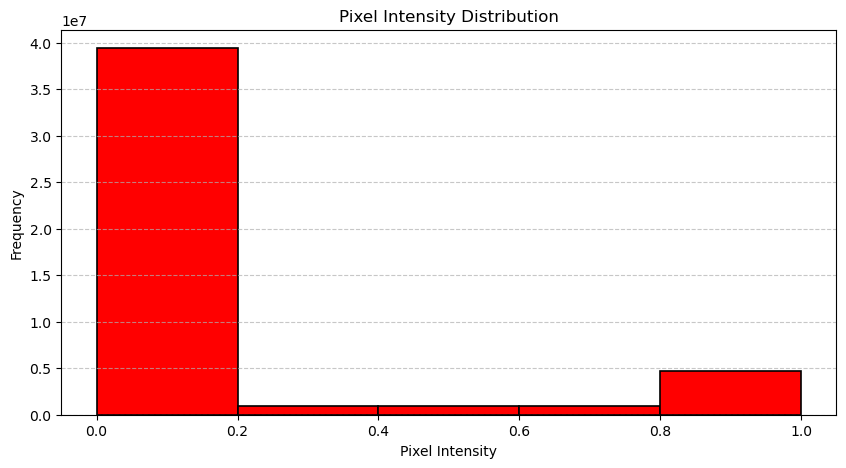

In [7]:
# Visualizing the pixel intensity distribution with adjusted bins and bar width
plt.figure(figsize=(10, 5))  # Setting the figure size for the plot
plt.hist(train_images.flatten(), bins=5, color='red', edgecolor='black', linewidth=1.2)  # Creating a histogram of pixel intensities with adjusted bins
plt.xlabel('Pixel Intensity')  # Setting the x-axis label
plt.ylabel('Frequency')  # Setting the y-axis label
plt.title('Pixel Intensity Distribution')  # Setting the title of the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines to the y-axis
plt.show()  # Displaying the plot


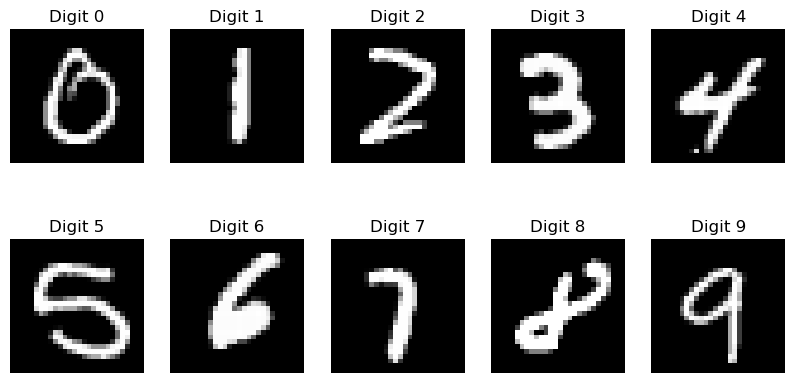

In [8]:
# Visualize class-specific images

plt.figure(figsize=(10, 5))  # Setting the figure size for the plot

# Looping through each digit (0 to 9)
for digit in range(10):
    # Finding indices of samples belonging to the current digit
    digit_indices = np.where(train_labels[:, digit] == 1)[0]
    
    # Checking if there are samples available for the current digit
    if len(digit_indices) > 0:
        # Choosing a random sample index from available indices
        sample_index = np.random.choice(digit_indices)
        
        # Subplotting to display the image for the current digit
        plt.subplot(2, 5, digit + 1)
        
        # Displaying the image corresponding to the chosen sample index
        plt.imshow(train_images[sample_index], cmap='gray')
        
        # Setting title of the subplot with the current digit
        plt.title(f'Digit {digit}')
        
        # Turning off axis ticks and labels for better visualization
        plt.axis('off')
    else:
        # Printing a message if no samples are found for the current digit
        print(f"No samples found for digit {digit}")

plt.show()  # Displaying the plot


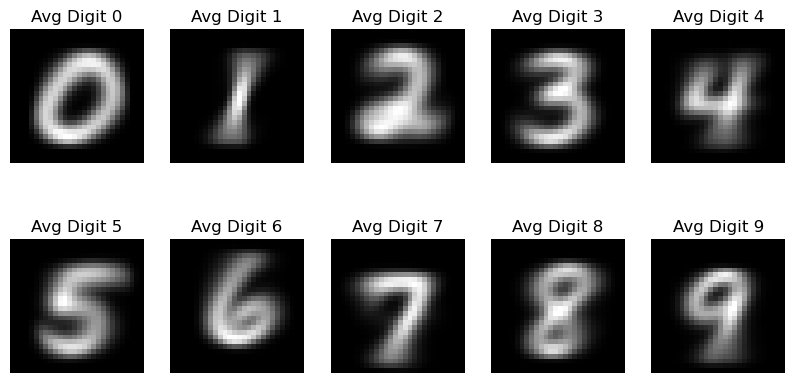

In [9]:
# Visualize class-wise average images

plt.figure(figsize=(10, 5))  # Setting the figure size for the plot

# Looping through each digit (0 to 9)
for digit in range(10):
    # Selecting the images corresponding to the current digit
    digit_images = train_images[train_labels[:, digit] == 1]
    
    # Computing the average image for the current digit
    avg_image = np.mean(digit_images, axis=0)
    
    # Subplotting to display the average image for the current digit
    plt.subplot(2, 5, digit + 1)
    
    # Displaying the average image using grayscale colormap
    plt.imshow(avg_image[:, :, 0], cmap='gray')
    
    # Setting the title of the subplot with the current digit
    plt.title(f'Avg Digit {digit}')
    
    # Turning off axis ticks and labels for better visualization
    plt.axis('off')

plt.show()  # Displaying the plot


# The Solution: implement a data science solution to the problem you are trying to solve.

The idea behind solving the identification of hand-written digit problem is to use the MNIST dataset to train and assess many deep learning models. Here is a brief outline of the methodology using the below four mentioned models:

*Data Preprocessing:* 
To prepare the MNIST dataset for modeling, reshape the photos into the proper format and normalize the pixel values.

*Model Architecture Selection:*
For the digit recognition challenge, select three distinct deep learning architectures. For instance, one can choose from Multi-Layer Perceptrons (MLPs), Recurrent Neural Networks (RNNs), and Convolutional Neural Networks (CNNs), and the Gated Recurrent Unit (GRU) models.

*Model Training:*
Validate each chosen model on a different validation set and train it on the training data. To reduce overfitting and enhance convergence, employ strategies like learning rate scheduling and early stopping.

*Model Evaluation:*
Use the test set to evaluate the trained models' performance in terms of accuracy and other pertinent metrics. Examine the outcomes derived from various models.

*Hyperparameter Tuning:* 
To further maximize each model's performance, you can choose to adjust its hyperparameters. This could entail modifying dropout rates, batch sizes, learning rates, etc.

*Comparison of Results:* 
Examine how well the three models perform in terms of criteria like computational efficiency, accuracy, precision, recall, and F1-score. Examine the advantages and disadvantages of each model.



* Codes to implement the solution in python:

In [10]:
import numpy as np
from tensorflow.keras.datasets import mnist  # Importing MNIST dataset
from tensorflow.keras.utils import to_categorical  # Importing utility function for one-hot encoding
from tensorflow.keras.models import Sequential  # Importing Sequential model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM, SimpleRNN, Dropout, GRU  # Importing different layers
from tensorflow.keras.optimizers import Adam  # Importing Adam optimizer


# Define CNN model with reduced complexity
cnn_model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Reduced number of filters
    MaxPooling2D((2, 2)),  # Max pooling layer
    Flatten(),  # Flatten layer to convert 2D input to 1D
    Dense(16, activation='relu'),  # Reduced number of neurons in the dense layer
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes and softmax activation
])

# Compile CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compiling the model with Adam optimizer, categorical crossentropy loss, and accuracy metric

# Train CNN model
cnn_history = cnn_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)  # Training the model on training data with a batch size of 64 and validation split of 0.1

# Define RNN model with reduced complexity
rnn_model = Sequential([
    SimpleRNN(32, input_shape=(28, 28)),  # Reduced number of units in the SimpleRNN layer
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes and softmax activation
])

# Define GRU model with reduced complexity
gru_model = Sequential([
    # GRU layer with reduced number of units
    GRU(32, input_shape=(28, 28)),
    # Output layer with 10 units for 10 classes and softmax activation
    Dense(10, activation='softmax')
])

# Compile RNN model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compiling the model with Adam optimizer, categorical crossentropy loss, and accuracy metric

# Train RNN model
rnn_history = rnn_model.fit(train_images.reshape((60000, 28, 28)), train_labels, epochs=10, batch_size=64, validation_split=0.1)  # Training the model on reshaped training data with a batch size of 64 and validation split of 0.1

# Define MLP model with reduced complexity
mlp_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten layer to convert 2D input to 1D
    Dense(32, activation='relu'),  # Reduced number of neurons in the dense layer
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5 to prevent overfitting
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes and softmax activation
])

# Compile MLP model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compiling the model with Adam optimizer, categorical crossentropy loss, and accuracy metric

# Train MLP model
mlp_history = mlp_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)  # Training the model on training data with a batch size of 64 and validation split of 0.1

# Compile GRU model
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train GRU model
gru_history = gru_model.fit(train_images.reshape((60000, 28, 28)), train_labels, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate models on test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels)  # Evaluating CNN model on test data
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(test_images.reshape((10000, 28, 28)), test_labels)  # Evaluating RNN model on reshaped test data
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(test_images, test_labels)  # Evaluating MLP model on test data
gru_test_loss, gru_test_acc = gru_model.evaluate(test_images.reshape((10000, 28, 28)), test_labels) # Evaluating GRU model on test set

# Printing test accuracies of each model
print("CNN Test Accuracy:", cnn_test_acc)
print("RNN Test Accuracy:", rnn_test_acc)
print("MLP Test Accuracy:", mlp_test_acc)
print("GRU Test Accuracy:", gru_test_acc)



Epoch 1/10
844/844 [==============================] - 15s 16ms/step - loss: 0.4461 - accuracy: 0.8668 - val_loss: 0.1715 - val_accuracy: 0.9552
Epoch 2/10
844/844 [==============================] - 17s 20ms/step - loss: 0.1757 - accuracy: 0.9489 - val_loss: 0.1199 - val_accuracy: 0.9670
Epoch 3/10
844/844 [==============================] - 13s 16ms/step - loss: 0.1282 - accuracy: 0.9623 - val_loss: 0.1023 - val_accuracy: 0.9717
Epoch 4/10
844/844 [==============================] - 10s 12ms/step - loss: 0.1049 - accuracy: 0.9686 - val_loss: 0.0883 - val_accuracy: 0.9762
Epoch 5/10
844/844 [==============================] - 13s 16ms/step - loss: 0.0891 - accuracy: 0.9739 - val_loss: 0.0890 - val_accuracy: 0.9777
Epoch 6/10
844/844 [==============================] - 18s 21ms/step - loss: 0.0772 - accuracy: 0.9767 - val_loss: 0.0792 - val_accuracy: 0.9787
Epoch 7/10
844/844 [==============================] - 17s 21ms/step - loss: 0.0685 - accuracy: 0.9798 - val_loss: 0.0756 - val_accuracy:

# Results: summarized and visualized the results discovered from the analysis

* Figures or tables to present the results.


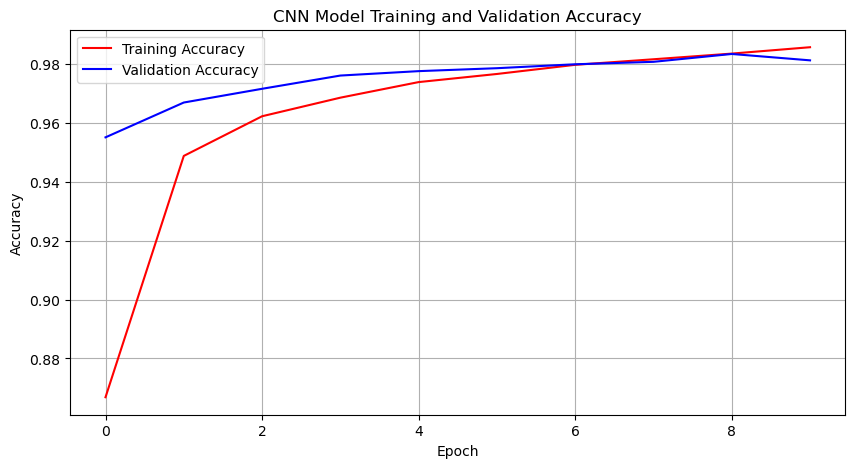

In [11]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Plot training and validation accuracy for CNN model
plt.figure(figsize=(10, 5))  # Setting the figure size
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy', color = 'red')  # Plotting training accuracy
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy', color = 'blue')  # Plotting validation accuracy
plt.title('CNN Model Training and Validation Accuracy')  # Setting the title of the plot
plt.xlabel('Epoch')  # Setting the label for x-axis
plt.ylabel('Accuracy')  # Setting the label for y-axis
plt.legend()  # Adding legend to the plot
plt.grid(True)  # Adding grid lines
plt.show()  # Displaying the plot



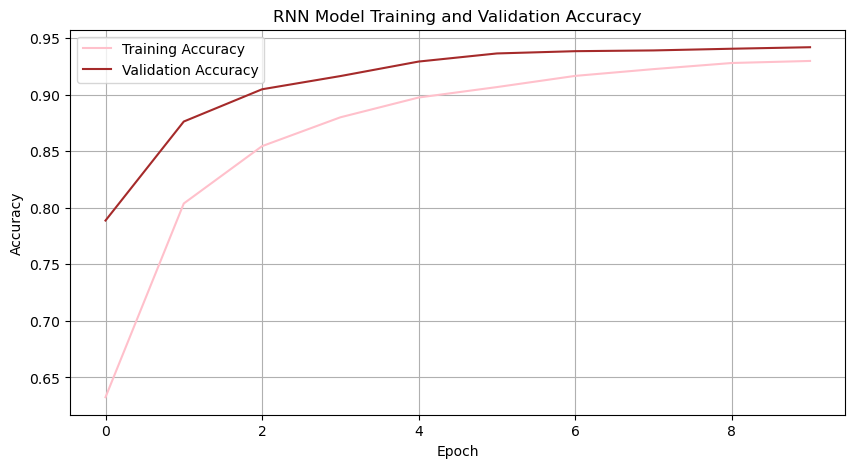

In [12]:
# Plot training and validation accuracy for RNN model

plt.figure(figsize=(10, 5))  # Creating a new figure with a specific size
plt.plot(rnn_history.history['accuracy'], label='Training Accuracy', color = 'pink')  # Plotting training accuracy
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy', color = 'brown')  # Plotting validation accuracy
plt.title('RNN Model Training and Validation Accuracy')  # Setting the title of the plot
plt.xlabel('Epoch')  # Setting the label for the x-axis
plt.ylabel('Accuracy')  # Setting the label for the y-axis
plt.legend()  # Adding a legend to the plot
plt.grid(True)  # Showing the grid lines
plt.show()  # Displaying the plot


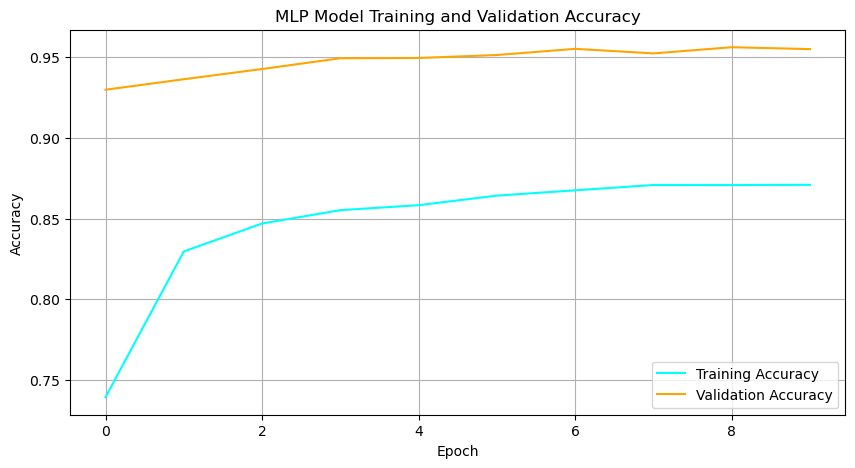

In [13]:
# Plot training and validation accuracy for MLP model

plt.figure(figsize=(10, 5))  # Creating a new figure with a specific size
plt.plot(mlp_history.history['accuracy'], label='Training Accuracy', color = 'cyan')  # Plotting training accuracy
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy', color = 'orange')  # Plotting validation accuracy
plt.title('MLP Model Training and Validation Accuracy')  # Setting the title of the plot
plt.xlabel('Epoch')  # Setting the label for the x-axis
plt.ylabel('Accuracy')  # Setting the label for the y-axis
plt.legend()  # Adding legend to the plot
plt.grid(True)  # Showing the grid lines
plt.show()  # Displaying the plot


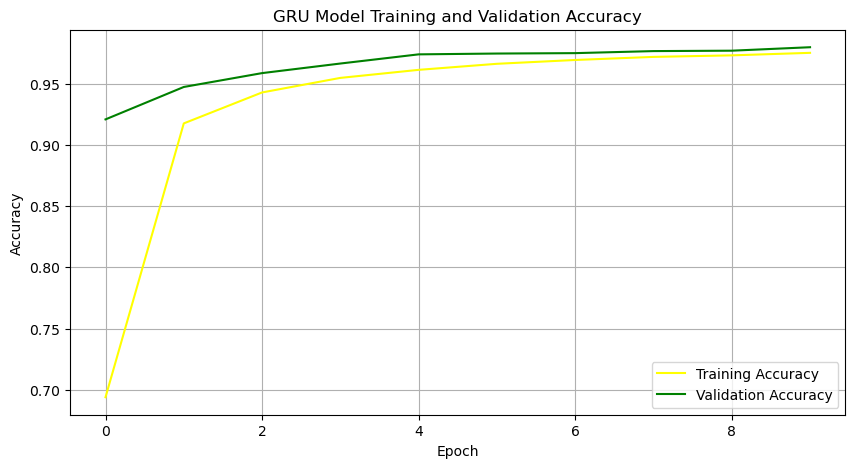

In [14]:
# Plot training and validation accuracy for GRU model

plt.figure(figsize=(10, 5))  # Setting the figure size for the plot
plt.plot(gru_history.history['accuracy'], label='Training Accuracy', color = 'yellow')  # Plotting training accuracy over epochs
plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy', color = 'green')  # Plotting validation accuracy over epochs
plt.title('GRU Model Training and Validation Accuracy')  # Setting the title of the plot
plt.xlabel('Epoch')  # Labeling the x-axis as Epoch
plt.ylabel('Accuracy')  # Labeling the y-axis as Accuracy
plt.legend()  # Displaying the legend indicating which line represents training and validation accuracy
plt.grid(True)  # Adding grid lines to the plot
plt.show()  # Displaying the plot


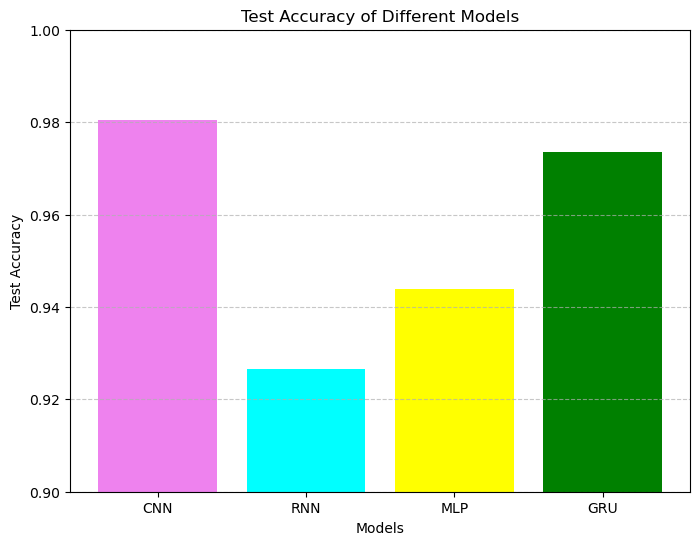

In [15]:
# List of model names
models = ['CNN', 'RNN', 'MLP', 'GRU']

# List of test accuracies corresponding to each model
test_accuracies = [cnn_test_acc, rnn_test_acc, mlp_test_acc, gru_test_acc]

# Creating a bar plot to visualize test accuracies
plt.figure(figsize=(8, 6))  # Setting figure size
plt.bar(models, test_accuracies, color=['violet', 'cyan', 'yellow', 'green'])  # Creating bar plot with specified colors for each model
plt.title('Test Accuracy of Different Models')  # Setting plot title
plt.xlabel('Models')  # Setting x-axis label
plt.ylabel('Test Accuracy')  # Setting y-axis label
plt.ylim(0.9, 1.0)  # Setting y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines
plt.show()  # Displaying the plot
